### **PREDIÇÃO POR AM - DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**



Data: 22/10/2021

Filipe Loyola Lopes





Informativo: 

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

# **SET3: APENAS GRUPO 1 (NÃO GRAVE) E GRUPO 2 (GRAVE)**

In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from google.colab import files
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTAÇÃO DOS DADOS**

In [3]:
df_sirio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/AM/sirio_aprendizado_v3.csv', sep='|', encoding='utf-8')
print(df_sirio.shape)
df_sirio.head(3)

(4320, 33)


,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1
1,1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1
2,2,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df_sirio = df_sirio.drop(columns=(['Unnamed: 0', 'Sexo']))
print(df_sirio.shape)
df_sirio.head(1)

(4320, 31)


,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1


In [5]:
cenario1 = df_sirio

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_0'].index, inplace=True)

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_3'].index, inplace=True)

print('GRUPO_0: ', cenario1[cenario1['GRUPO']=='GRUPO_0'].shape)

print('GRUPO_1: ', cenario1[cenario1['GRUPO']=='GRUPO_1'].shape)

print('GRUPO_2: ', cenario1[cenario1['GRUPO']=='GRUPO_2'].shape)

print('GRUPO_3: ', cenario1[cenario1['GRUPO']=='GRUPO_3'].shape)

GRUPO_0:  (0, 31)
GRUPO_1:  (533, 31)
GRUPO_2:  (85, 31)
GRUPO_3:  (0, 31)


### **CRIANDO COLUNA GRAVIDADE (TARGET)**

GRAVE -> 1

NÃO GRAVE -> 0

*   Item da lista
*   Item da lista



In [6]:
d_2 = {'GRUPO_2' : 1, 'GRUPO_1':0}
cenario1['GRAVIDADE'] = cenario1['GRUPO'].map(d_2) #colocando 0 e 1 na coluna target
cenario1.head(6)

,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
5,003F1F4C194763E4A00FD809AF5FA6AA,GRUPO_1,65,79.0,76.0,10.0,0.2,33.4,0.95,10.0,0.2,4.63,30.7,42.5,14.2,5460.0,960.0,17.6,350.0,6.4,4130.0,75.6,212000.0,4.2,14.09,12.9,135.0,25.0,91.8,10.2,1,0
26,0162D896109ED193BDE84532A63C4CFF,GRUPO_1,63,20.0,14.0,40.0,0.4,32.8,0.65,50.0,0.5,4.78,29.1,42.4,13.9,10270.0,2440.0,23.8,850.0,8.3,6890.0,67.0,329000.0,3.8,0.43,14.8,137.0,37.0,88.7,10.9,0,0
30,01A1C39530DE1A97D9F368049FE20AA3,GRUPO_1,13,16.0,22.0,20.0,0.3,35.7,0.60,200.0,2.9,4.45,27.9,34.7,12.4,6930.0,2930.0,42.3,720.0,10.4,3060.0,44.1,319000.0,4.0,0.05,11.9,142.0,33.0,78.0,9.6,1,0
42,02841BEE80CACF7A5B4934967A2E7738,GRUPO_1,64,NaN,NaN,20.0,0.3,35.0,1.00,120.0,2.1,4.97,30.6,43.4,15.2,5740.0,1760.0,30.7,460.0,8.0,3380.0,58.9,187000.0,4.1,0.69,12.4,139.0,36.0,87.3,9.9,1,0
52,03036E47F44A54420561DA8A450EA671,GRUPO_1,32,17.0,14.0,70.0,1.3,32.2,0.95,330.0,6.0,4.86,27.0,40.7,13.1,5460.0,3060.0,56.0,350.0,6.4,1650.0,30.3,223000.0,3.8,0.10,13.2,138.0,17.0,83.7,10.1,0,0
54,030EDDDD0CA4A6BA5DCDA94F3A933ECF,GRUPO_1,56,17.0,23.0,40.0,0.6,33.7,0.84,90.0,1.3,4.99,28.3,41.9,14.1,6770.0,1990.0,29.4,370.0,5.5,4280.0,63.2,261000.0,4.0,0.07,13.2,143.0,29.0,84.0,9.3,0,0


In [7]:
cenario1 = cenario1.drop(columns=['GRUPO'])

### **SEPARANDO GRUPOS PARA TREINO E GRUPOS PARA TESTE**

In [8]:
#obs: apagar coluna GRAVIDADE depois

X_train, X_test, y_train, y_test = train_test_split(cenario1.drop(['ID_PACIENTE'], axis=1), cenario1['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (432, 30)


Dados de teste(186, 30)


In [9]:
y_train[y_train == 0].shape

(373,)

In [10]:
y_train[y_train == 1].shape

(59,)

In [11]:
y_test[y_test == 0].shape

(160,)

In [12]:
y_test[y_test == 1].shape

(26,)

In [13]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3526,37,69.0,23.0,60.0,0.7,33.4,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.8,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.4,10.2,0,0
2543,47,15.0,21.0,30.0,0.5,33.4,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.7,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.2,12.0,0,0
3289,49,NaN,NaN,40.0,0.6,32.1,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.9,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.0,11.0,0,0
1490,26,NaN,NaN,30.0,0.5,32.9,NaN,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.7,390.0,6.1,3830.0,60.3,285000.0,NaN,0.06,12.1,NaN,NaN,91.9,10.6,0,0
871,61,NaN,NaN,40.0,0.6,34.6,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.9,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.2,10.3,1,0
2381,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.9,9.7,1,1
3615,58,9.0,17.0,0.0,0.0,33.6,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.9,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.9,9.0,1,0
1218,64,33.0,23.0,10.0,0.2,35.9,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.1,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.8,10.2,1,0
3551,46,10.0,13.0,60.0,0.9,33.9,NaN,770.0,11.6,4.25,30.6,38.3,13.0,6630.0,1990.0,30.0,550.0,8.3,3260.0,49.2,240000.0,NaN,0.04,13.6,NaN,NaN,90.1,11.4,0,0


In [14]:
y_train.head(3)

3526    0
2543    0
3289    0
Name: GRAVIDADE, dtype: int64

In [15]:
X_test.head(3)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3300,59,NaN,NaN,30.0,0.8,32.6,NaN,110.0,3.0,3.97,30.5,37.1,12.1,3630.0,980.0,27.0,400.0,11.0,2110.0,58.2,272000.0,NaN,0.19,12.5,NaN,NaN,93.5,11.7,0,0
3199,39,NaN,NaN,40.0,0.5,35.1,1.18,130.0,1.5,5.40,30.2,46.4,16.3,8450.0,3430.0,40.6,580.0,6.9,4270.0,50.5,319000.0,3.7,NaN,12.5,139.0,42.0,85.9,9.9,1,0
1362,31,NaN,NaN,20.0,0.3,34.0,1.17,250.0,3.3,3.64,30.8,32.9,11.2,7680.0,1770.0,23.0,680.0,8.9,4960.0,64.5,261000.0,3.9,NaN,13.0,138.0,42.0,90.4,9.5,0,0


In [16]:
y_test.head(3)

3300    0
3199    0
1362    0
Name: GRAVIDADE, dtype: int64

In [17]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3526,37,69.0,23.0,60.0,0.7,33.4,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.8,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.4,10.2,0,0
2543,47,15.0,21.0,30.0,0.5,33.4,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.7,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.2,12.0,0,0
3289,49,NaN,NaN,40.0,0.6,32.1,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.9,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.0,11.0,0,0
1490,26,NaN,NaN,30.0,0.5,32.9,NaN,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.7,390.0,6.1,3830.0,60.3,285000.0,NaN,0.06,12.1,NaN,NaN,91.9,10.6,0,0
871,61,NaN,NaN,40.0,0.6,34.6,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.9,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.2,10.3,1,0
2381,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.9,9.7,1,1
3615,58,9.0,17.0,0.0,0.0,33.6,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.9,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.9,9.0,1,0
1218,64,33.0,23.0,10.0,0.2,35.9,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.1,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.8,10.2,1,0
3551,46,10.0,13.0,60.0,0.9,33.9,NaN,770.0,11.6,4.25,30.6,38.3,13.0,6630.0,1990.0,30.0,550.0,8.3,3260.0,49.2,240000.0,NaN,0.04,13.6,NaN,NaN,90.1,11.4,0,0


In [18]:
target = X_train['GRAVIDADE']
target

3526    0
2543    0
3289    0
1490    0
871     0
       ..
1823    1
90      0
2401    0
1253    0
4000    0
Name: GRAVIDADE, Length: 432, dtype: int64

### **PREPARANDO OS DADOS PARA O APRENDIZADO**

In [19]:
Q1 = X_train.quantile(.25)
Q3 = X_train.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 3*IIQ
limite_superior = Q3 + 3*IIQ

In [20]:
#aplicando o filtro apenas nos dados de treino

selecao = (X_train >= limite_inferior) & (X_train <= limite_superior)

novos_dados = X_train[selecao]

#novos_dados.apply(lambda x: x.fillna(x.median()), axis=0)

In [21]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3526,37,69.0,23.0,60.0,0.7,33.4,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.8,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.4,10.2,0,0.0
2543,47,15.0,21.0,30.0,0.5,33.4,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.7,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.2,12.0,0,0.0
3289,49,NaN,NaN,40.0,0.6,32.1,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.9,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.0,11.0,0,0.0
1490,26,NaN,NaN,30.0,0.5,32.9,NaN,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.7,390.0,6.1,3830.0,60.3,285000.0,NaN,0.06,12.1,NaN,NaN,91.9,10.6,0,0.0
871,61,NaN,NaN,40.0,0.6,34.6,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.9,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.2,10.3,1,0.0
2381,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.9,9.7,1,NaN
3615,58,9.0,17.0,0.0,0.0,33.6,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.9,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.9,9.0,1,0.0
1218,64,33.0,23.0,10.0,0.2,35.9,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.1,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.8,10.2,1,0.0
3551,46,10.0,13.0,60.0,0.9,33.9,NaN,NaN,NaN,4.25,30.6,38.3,13.0,6630.0,1990.0,30.0,550.0,8.3,3260.0,49.2,240000.0,NaN,0.04,13.6,NaN,NaN,90.1,11.4,0,0.0


In [22]:
novos_dados['GRAVIDADE'] = target

In [23]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3526,37,69.0,23.0,60.0,0.7,33.4,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.8,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.4,10.2,0,0
2543,47,15.0,21.0,30.0,0.5,33.4,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.7,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.2,12.0,0,0
3289,49,NaN,NaN,40.0,0.6,32.1,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.9,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.0,11.0,0,0
1490,26,NaN,NaN,30.0,0.5,32.9,NaN,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.7,390.0,6.1,3830.0,60.3,285000.0,NaN,0.06,12.1,NaN,NaN,91.9,10.6,0,0
871,61,NaN,NaN,40.0,0.6,34.6,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.9,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.2,10.3,1,0
2381,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.9,9.7,1,1
3615,58,9.0,17.0,0.0,0.0,33.6,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.9,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.9,9.0,1,0
1218,64,33.0,23.0,10.0,0.2,35.9,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.1,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.8,10.2,1,0
3551,46,10.0,13.0,60.0,0.9,33.9,NaN,NaN,NaN,4.25,30.6,38.3,13.0,6630.0,1990.0,30.0,550.0,8.3,3260.0,49.2,240000.0,NaN,0.04,13.6,NaN,NaN,90.1,11.4,0,0


In [24]:
novos_dados[novos_dados['GRAVIDADE']==1]

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.9,9.7,1,1
1124,52,40.0,38.0,30.0,0.6,33.3,0.88,120.0,2.4,5.42,27.9,45.3,15.1,4930.0,1250.0,25.4,520.0,10.5,3010.0,61.1,239000.0,4.0,0.71,13.7,136.0,33.0,83.6,9.8,1,1
2455,89,22.0,26.0,40.0,0.5,33.3,0.93,130.0,1.6,4.82,28.4,41.2,13.7,7930.0,1920.0,24.2,1050.0,13.2,4790.0,60.5,302000.0,4.1,1.14,14.1,135.0,34.0,85.5,9.9,0,1
2633,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1507,2,NaN,NaN,40.0,0.4,33.2,0.22,250.0,2.8,3.71,26.4,29.5,9.8,8980.0,NaN,59.8,710.0,7.9,2610.0,29.1,145000.0,3.7,1.36,NaN,134.0,18.0,79.5,NaN,0,1
1168,69,13.0,18.0,30.0,0.5,32.8,0.68,20.0,0.3,5.38,28.4,46.6,15.3,5730.0,730.0,12.7,260.0,4.5,4690.0,82.0,230000.0,3.9,0.13,12.9,142.0,26.0,86.6,9.2,0,1
481,73,21.0,20.0,20.0,0.3,34.0,1.15,10.0,0.2,4.63,31.1,42.3,14.4,6370.0,320.0,5.0,230.0,3.6,5790.0,90.9,190000.0,4.1,0.32,12.5,137.0,32.0,91.4,10.4,1,1
2166,71,17.0,16.0,80.0,1.2,32.9,0.86,110.0,1.6,5.40,29.6,48.7,16.0,6820.0,1500.0,22.0,520.0,7.6,4610.0,67.6,191000.0,4.2,0.15,13.1,139.0,41.0,90.2,12.2,1,1
4023,62,NaN,NaN,20.0,0.3,33.4,0.75,120.0,1.9,4.80,30.2,43.4,14.5,6200.0,1540.0,24.8,400.0,6.5,4120.0,66.5,169000.0,4.0,0.34,13.2,141.0,23.0,90.4,9.6,0,1
3342,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


### **TRATANDO VALORES AUSENTES**

In [25]:
novos_dados.isnull().sum()

Idade                         0
ALT (TGP)                   134
AST (TGO)                   133
Basófilos                    26
Basófilos (%)                26
CHCM                         24
Creatinina                   64
Eosinófilos                  30
Eosinófilos (%)              25
Eritrócitos                  23
HCM                          29
Hematócrito                  23
Hemoglobina                  23
Leucócitos                   27
Linfócitos                   25
Linfócitos (%)               23
Monócitos                    24
Monócitos (%)                27
Neutrófilos                  29
Neutrófilos (%)              24
Plaquetas                    24
Potássio                     94
Proteína C-Reativa           80
RDW                          29
Sódio                        93
Uréia                        74
VCM                          27
Volume plaquetário médio     28
SEXO                          0
GRAVIDADE                     0
dtype: int64

In [26]:
mediana_NAO_GRAVE = novos_dados[novos_dados['GRAVIDADE']==0].median(skipna=True)
mediana_NAO_GRAVE

Idade                           53.00
ALT (TGP)                       27.00
AST (TGO)                       23.00
Basófilos                       20.00
Basófilos (%)                    0.40
CHCM                            33.65
Creatinina                       0.91
Eosinófilos                     70.00
Eosinófilos (%)                  1.20
Eritrócitos                      4.76
HCM                             29.80
Hematócrito                     41.80
Hemoglobina                     14.00
Leucócitos                    5760.00
Linfócitos                    1440.00
Linfócitos (%)                  27.25
Monócitos                      550.00
Monócitos (%)                    8.70
Neutrófilos                   3420.00
Neutrófilos (%)                 61.30
Plaquetas                   207000.00
Potássio                         4.00
Proteína C-Reativa               0.52
RDW                             12.90
Sódio                          139.00
Uréia                           32.00
VCM         

In [27]:
mediana_GRAVE = novos_dados[novos_dados['GRAVIDADE']==1].median(skipna=True)
mediana_GRAVE

Idade                           69.000
ALT (TGP)                       24.000
AST (TGO)                       23.000
Basófilos                       30.000
Basófilos (%)                    0.400
CHCM                            33.400
Creatinina                       1.000
Eosinófilos                     95.000
Eosinófilos (%)                  1.500
Eritrócitos                      4.770
HCM                             29.700
Hematócrito                     42.400
Hemoglobina                     14.200
Leucócitos                    6710.000
Linfócitos                    1495.000
Linfócitos (%)                  23.800
Monócitos                      620.000
Monócitos (%)                    8.250
Neutrófilos                   4200.000
Neutrófilos (%)                 65.650
Plaquetas                   208000.000
Potássio                         4.000
Proteína C-Reativa               0.405
RDW                             13.200
Sódio                          139.000
Uréia                    

In [28]:
mediana_GRAVE - mediana_NAO_GRAVE

Idade                         16.000
ALT (TGP)                     -3.000
AST (TGO)                      0.000
Basófilos                     10.000
Basófilos (%)                  0.000
CHCM                          -0.250
Creatinina                     0.090
Eosinófilos                   25.000
Eosinófilos (%)                0.300
Eritrócitos                    0.010
HCM                           -0.100
Hematócrito                    0.600
Hemoglobina                    0.200
Leucócitos                   950.000
Linfócitos                    55.000
Linfócitos (%)                -3.450
Monócitos                     70.000
Monócitos (%)                 -0.450
Neutrófilos                  780.000
Neutrófilos (%)                4.350
Plaquetas                   1000.000
Potássio                       0.000
Proteína C-Reativa            -0.115
RDW                            0.300
Sódio                          0.000
Uréia                          4.500
VCM                            1.050
V

In [29]:
novos_dados.loc[novos_dados['GRAVIDADE']==0] = novos_dados[novos_dados['GRAVIDADE']==0].fillna(mediana_NAO_GRAVE)

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3526,37,69.0,23.0,60.0,0.7,33.40,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.80,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.40,10.2,0,0
2543,47,15.0,21.0,30.0,0.5,33.40,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.70,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.20,12.0,0,0
3289,49,27.0,23.0,40.0,0.6,32.10,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.90,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.00,11.0,0,0
1490,26,27.0,23.0,30.0,0.5,32.90,0.91,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.70,390.0,6.1,3830.0,60.3,285000.0,4.0,0.06,12.1,139.0,32.0,91.90,10.6,0,0
871,61,27.0,23.0,40.0,0.6,34.60,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.90,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.20,10.3,1,0
2381,49,27.0,23.0,20.0,0.4,33.65,0.91,70.0,1.2,4.76,29.8,41.8,14.0,5760.0,1440.0,27.25,550.0,8.7,3420.0,61.3,207000.0,4.0,0.52,12.9,139.0,32.0,88.15,10.2,0,0
4191,45,70.0,47.0,30.0,0.4,34.40,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.30,650.0,9.3,5140.0,73.6,226000.0,NaN,0.99,12.9,NaN,29.0,90.90,9.7,1,1
3615,58,9.0,17.0,0.0,0.0,33.60,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.90,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.90,9.0,1,0
1218,64,33.0,23.0,10.0,0.2,35.90,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.10,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.80,10.2,1,0
3551,46,10.0,13.0,60.0,0.9,33.90,0.91,70.0,1.2,4.25,30.6,38.3,13.0,6630.0,1990.0,30.00,550.0,8.3,3260.0,49.2,240000.0,4.0,0.04,13.6,139.0,32.0,90.10,11.4,0,0


In [30]:
print(novos_dados[novos_dados['GRAVIDADE']==0].shape)

(373, 30)


In [31]:
novos_dados.loc[novos_dados['GRAVIDADE']==1] = novos_dados[novos_dados['GRAVIDADE']==1].fillna(mediana_GRAVE)


In [32]:
print(novos_dados[novos_dados['GRAVIDADE']==1].shape)

novos_dados[novos_dados['GRAVIDADE']==1].head()

(59, 30)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
4191,45,70.0,47.0,30.0,0.4,34.4,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.3,650.0,9.30,5140.0,73.60,226000.0,4.0,0.990,12.9,139.0,29.0,90.9,9.7,1,1
1124,52,40.0,38.0,30.0,0.6,33.3,0.88,120.0,2.4,5.42,27.9,45.3,15.1,4930.0,1250.0,25.4,520.0,10.50,3010.0,61.10,239000.0,4.0,0.710,13.7,136.0,33.0,83.6,9.8,1,1
2455,89,22.0,26.0,40.0,0.5,33.3,0.93,130.0,1.6,4.82,28.4,41.2,13.7,7930.0,1920.0,24.2,1050.0,13.20,4790.0,60.50,302000.0,4.1,1.140,14.1,135.0,34.0,85.5,9.9,0,1
2633,75,24.0,23.0,30.0,0.4,33.4,1.00,95.0,1.5,4.77,29.7,42.4,14.2,6710.0,1495.0,23.8,620.0,8.25,4200.0,65.65,208000.0,4.0,0.405,13.2,139.0,36.5,89.2,10.2,1,1
1507,2,24.0,23.0,40.0,0.4,33.2,0.22,250.0,2.8,3.71,26.4,29.5,9.8,8980.0,1495.0,59.8,710.0,7.90,2610.0,29.10,145000.0,3.7,1.360,13.2,134.0,18.0,79.5,10.2,0,1


In [33]:
#verificando valores nulos
novos_dados.isnull().sum()

Idade                       0
ALT (TGP)                   0
AST (TGO)                   0
Basófilos                   0
Basófilos (%)               0
CHCM                        0
Creatinina                  0
Eosinófilos                 0
Eosinófilos (%)             0
Eritrócitos                 0
HCM                         0
Hematócrito                 0
Hemoglobina                 0
Leucócitos                  0
Linfócitos                  0
Linfócitos (%)              0
Monócitos                   0
Monócitos (%)               0
Neutrófilos                 0
Neutrófilos (%)             0
Plaquetas                   0
Potássio                    0
Proteína C-Reativa          0
RDW                         0
Sódio                       0
Uréia                       0
VCM                         0
Volume plaquetário médio    0
SEXO                        0
GRAVIDADE                   0
dtype: int64

In [34]:
# Eliminando coluna target

novos_dados = novos_dados.drop(columns=['GRAVIDADE'])

print(novos_dados.shape)

novos_dados.head(3)

(432, 29)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
3526,37,69.0,23.0,60.0,0.7,33.4,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.8,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.4,10.2,0
2543,47,15.0,21.0,30.0,0.5,33.4,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.7,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.2,12.0,0
3289,49,27.0,23.0,40.0,0.6,32.1,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.9,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.0,11.0,0


### **INSERIR FEATURE RAZÃO NEUTROFILOS/LINFÓCITOS**

In [35]:
novos_dados['Razão neut/linf'] = novos_dados['Neutrófilos'] / novos_dados['Linfócitos']

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
3526,37,69.0,23.0,60.0,0.7,33.40,0.51,130.0,1.5,3.95,30.9,36.5,12.2,8680.0,2070.0,23.80,530.0,6.1,5890.0,67.9,413000.0,3.9,0.06,12.8,143.0,30.0,92.40,10.2,0,2.845411
2543,47,15.0,21.0,30.0,0.5,33.40,0.84,20.0,0.3,4.58,28.8,39.5,13.2,6430.0,2360.0,36.70,630.0,9.8,3390.0,52.7,214000.0,3.6,0.96,12.5,140.0,16.0,86.20,12.0,0,1.436441
3289,49,27.0,23.0,40.0,0.6,32.10,0.82,120.0,1.9,4.72,28.6,42.0,13.5,6440.0,2760.0,42.90,430.0,6.7,3090.0,47.9,217000.0,3.8,0.04,12.3,139.0,33.0,89.00,11.0,0,1.119565
1490,26,27.0,23.0,30.0,0.5,32.90,0.91,90.0,1.4,4.57,30.2,42.0,13.8,6350.0,2010.0,31.70,390.0,6.1,3830.0,60.3,285000.0,4.0,0.06,12.1,139.0,32.0,91.90,10.6,0,1.905473
871,61,27.0,23.0,40.0,0.6,34.60,1.10,20.0,0.3,5.25,30.5,46.3,16.0,6680.0,460.0,6.90,150.0,2.2,6010.0,90.0,183000.0,3.6,1.85,12.3,137.0,41.0,88.20,10.3,1,13.065217
2381,49,27.0,23.0,20.0,0.4,33.65,0.91,70.0,1.2,4.76,29.8,41.8,14.0,5760.0,1440.0,27.25,550.0,8.7,3420.0,61.3,207000.0,4.0,0.52,12.9,139.0,32.0,88.15,10.2,0,2.375000
4191,45,70.0,47.0,30.0,0.4,34.40,1.30,30.0,0.4,4.83,31.3,43.9,15.1,6990.0,1140.0,16.30,650.0,9.3,5140.0,73.6,226000.0,4.0,0.99,12.9,139.0,29.0,90.90,9.7,1,4.508772
3615,58,9.0,17.0,0.0,0.0,33.60,1.34,0.0,0.0,4.64,31.3,43.1,14.5,4550.0,680.0,14.90,380.0,8.4,3490.0,76.7,177000.0,3.9,0.96,14.1,139.0,45.0,92.90,9.0,1,5.132353
1218,64,33.0,23.0,10.0,0.2,35.90,0.91,40.0,0.9,4.74,31.9,42.1,15.1,4420.0,800.0,18.10,310.0,7.0,3260.0,73.8,148000.0,4.2,3.13,12.1,142.0,41.0,88.80,10.2,1,4.075000
3551,46,10.0,13.0,60.0,0.9,33.90,0.91,70.0,1.2,4.25,30.6,38.3,13.0,6630.0,1990.0,30.00,550.0,8.3,3260.0,49.2,240000.0,4.0,0.04,13.6,139.0,32.0,90.10,11.4,0,1.638191


**NORMALIZAÇÃO**

In [36]:
from sklearn import preprocessing

In [37]:
cols = novos_dados.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(novos_dados)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
0,0.397727,0.572727,0.21875,0.6,0.500000,0.500000,0.170588,0.282609,0.192308,0.304615,0.616162,0.382239,0.318681,0.528846,0.425791,0.381443,0.312500,0.230392,0.509597,0.625326,0.779762,0.40,0.004484,0.290909,0.90,0.275862,0.631068,0.434783,0.0,0.132690
1,0.511364,0.081818,0.18750,0.3,0.357143,0.500000,0.364706,0.043478,0.038462,0.498462,0.404040,0.498069,0.428571,0.362426,0.496350,0.603093,0.381944,0.411765,0.269674,0.426893,0.384921,0.25,0.139013,0.236364,0.75,0.034483,0.430421,0.826087,0.0,0.052549
2,0.534091,0.190909,0.21875,0.4,0.428571,0.290323,0.352941,0.260870,0.243590,0.541538,0.383838,0.594595,0.461538,0.363166,0.593674,0.709622,0.243056,0.259804,0.240883,0.364230,0.390873,0.35,0.001495,0.200000,0.70,0.327586,0.521036,0.608696,0.0,0.034526
3,0.272727,0.190909,0.21875,0.3,0.357143,0.419355,0.405882,0.195652,0.179487,0.495385,0.545455,0.594595,0.494505,0.356509,0.411192,0.517182,0.215278,0.230392,0.311900,0.526110,0.525794,0.45,0.004484,0.163636,0.70,0.310345,0.614887,0.521739,0.0,0.079227
4,0.670455,0.190909,0.21875,0.4,0.428571,0.693548,0.517647,0.043478,0.038462,0.704615,0.575758,0.760618,0.736264,0.380917,0.034063,0.091065,0.048611,0.039216,0.521113,0.913838,0.323413,0.25,0.272048,0.200000,0.60,0.465517,0.495146,0.456522,1.0,0.713982
5,0.534091,0.190909,0.21875,0.2,0.285714,0.540323,0.405882,0.152174,0.153846,0.553846,0.505051,0.586873,0.516484,0.312870,0.272506,0.440722,0.326389,0.357843,0.272553,0.539164,0.371032,0.45,0.073244,0.309091,0.70,0.310345,0.493528,0.434783,0.0,0.105934
6,0.488636,0.581818,0.59375,0.3,0.285714,0.661290,0.635294,0.065217,0.051282,0.575385,0.656566,0.667954,0.637363,0.403846,0.199513,0.252577,0.395833,0.387255,0.437620,0.699739,0.408730,0.45,0.143498,0.309091,0.70,0.258621,0.582524,0.326087,1.0,0.227300
7,0.636364,0.027273,0.12500,0.0,0.000000,0.532258,0.658824,0.000000,0.000000,0.516923,0.656566,0.637066,0.571429,0.223373,0.087591,0.228522,0.208333,0.343137,0.279271,0.740209,0.311508,0.40,0.139013,0.527273,0.70,0.534483,0.647249,0.173913,1.0,0.262769
8,0.704545,0.245455,0.21875,0.1,0.142857,0.903226,0.405882,0.086957,0.115385,0.547692,0.717172,0.598456,0.637363,0.213757,0.116788,0.283505,0.159722,0.274510,0.257198,0.702350,0.253968,0.55,0.463378,0.163636,0.85,0.465517,0.514563,0.434783,1.0,0.202628
9,0.500000,0.036364,0.06250,0.6,0.642857,0.580645,0.405882,0.152174,0.153846,0.396923,0.585859,0.451737,0.406593,0.377219,0.406326,0.487973,0.326389,0.338235,0.257198,0.381201,0.436508,0.45,0.001495,0.436364,0.70,0.310345,0.556634,0.695652,0.0,0.064025


In [38]:
X_train = novos_dados

In [39]:
X_train.shape

(432, 30)

### **MUTUAL INFORMATION PARA IDENTIFICAR ATRIBUTOS QUE SE RELACIONAM COM A COLUNA TARGET**

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

In [40]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.02266754, 0.07692011, 0.        , 0.00815072, 0.00111678,
       0.0350619 , 0.03880694, 0.00206081, 0.00144923, 0.04764317,
       0.00904546, 0.0106593 , 0.03309306, 0.0401636 , 0.02468632,
       0.        , 0.02933768, 0.00272887, 0.01387582, 0.04140538,
       0.00934274, 0.        , 0.09123355, 0.        , 0.        ,
       0.08272579, 0.        , 0.00062033, 0.02164665, 0.        ])

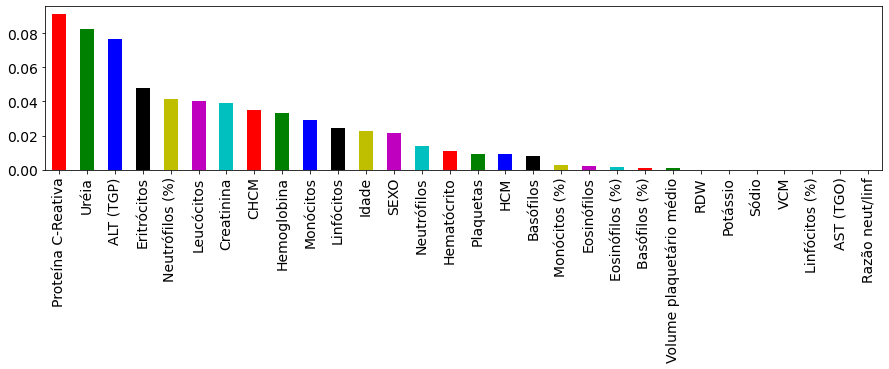

In [41]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

 A incidência de elevação de enzimas hepáticas, principalmente AST e ALT, em pacientes hospitalizados com Covid-19 varia de 14% a 53%, sendo ainda descrita a elevação discreta de bilirrubina total em até 10% dos casos.

FONTE: https://pebmed.com.br/covid-19-como-e-a-relacao-do-novo-coronavirus-com-o-figado/


### **CROSS VALIDATION**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time
from imblearn.under_sampling import RandomUnderSampler

#faz o balanceamento das classes
under = RandomUnderSampler(sampling_strategy='majority',  )
X_train, y_train = under.fit_resample(X_train, y_train)

seed = 20

scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='roc_auc',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='roc_auc',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'forest': GridSearchCV(  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))]),
        param_grid={
            'rf__max_depth': [1, 5, 10],
            'rf__max_features': ["auto", "sqrt","log2"],
            'rf__n_estimators': [1, 100, 500],
        },
        scoring='roc_auc',
        cv=gscv),
}

ini = time.time()

from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)
print(result)

fim = time.time()
print('\n')
print('Tempo de execução', round((fim - ini)/60, 4), 'minutos')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.458333  0.583333  0.583333   0.611111  0.638889  0.750000
1  0.819444  0.569444  0.500000   0.861111  0.777778  0.888889
2  0.819444  0.500000  0.500000   0.750000  0.777778  0.638889
3  0.861111  0.500000  0.500000   0.638889  0.638889  0.750000
4  0.694444  0.666667  0.750000   0.861111  0.611111  0.833333
5  0.708333  0.500000  0.500000   0.777778  0.527778  0.805556
6  0.833333  0.666667  0.666667   0.666667  0.638889  0.638889
7  0.666667  0.666667  0.666667   0.583333  0.611111  0.638889
8  0.566667  0.533333  0.545455   0.766667  0.700000  0.766667
9  0.750000  0.650000  0.636364   0.800000  0.666667  0.900000


Tempo de execução 13.9318 minutos


In [46]:
#novo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.72 ± 0.13
tree         0.58 ± 0.07
bigtree      0.58 ± 0.09
svmlinear    0.73 ± 0.10
svmrbf       0.66 ± 0.08
forest       0.76 ± 0.10
dtype: object

In [ ]:
#antigo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.85 ± 0.04
tree         0.84 ± 0.05
bigtree      0.80 ± 0.05
svmlinear    0.86 ± 0.01
svmrbf       0.86 ± 0.01
dtype: object

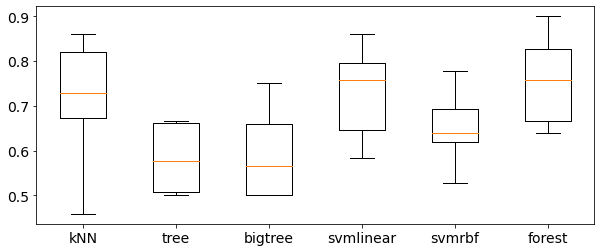

In [48]:
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.gcf().set_size_inches(10, 4)
plt.show()